<a href="https://colab.research.google.com/github/Sanjar-prog/Telegram-JavaScript-Bot/blob/main/Deep_Learning_Tayyorgarlik_ko'rish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
import fastai
fastai.__version__

'2.7.19'

In [3]:
torch.__version__

'2.6.0+cu124'

In [4]:
!pip install fastai==2.5.3

INFO: pip is looking at multiple versions of fastai to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement torch<1.11,>=1.7.0 (from fastai) (from versions: 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0, 2.7.0)
ERROR: No matching distribution found for torch<1.11,>=1.7.0


In [5]:
# kutubxonalarni yuklab olish
import torch
import fastai

# versiyalarini tekshirish
print(torch.__version__)
print(fastai.__version__)

2.6.0+cu124
2.7.19


In [8]:
# kutubxonalar
from fastai.vision.all import *
from ipywidgets import widgets
# data
path = untar_data(URLs.PETS)/'images'

# labellovchi funksiya
def is_cat(x): return x[0].isupper()

# datalarni yuklovchi (dataloaders)
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

# o'qitish (train)
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 160MB/s]


In [10]:
# rasm yuklash uchun widget
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Mushukmi?: True
Aniqlik ehtimolligi: 1.000


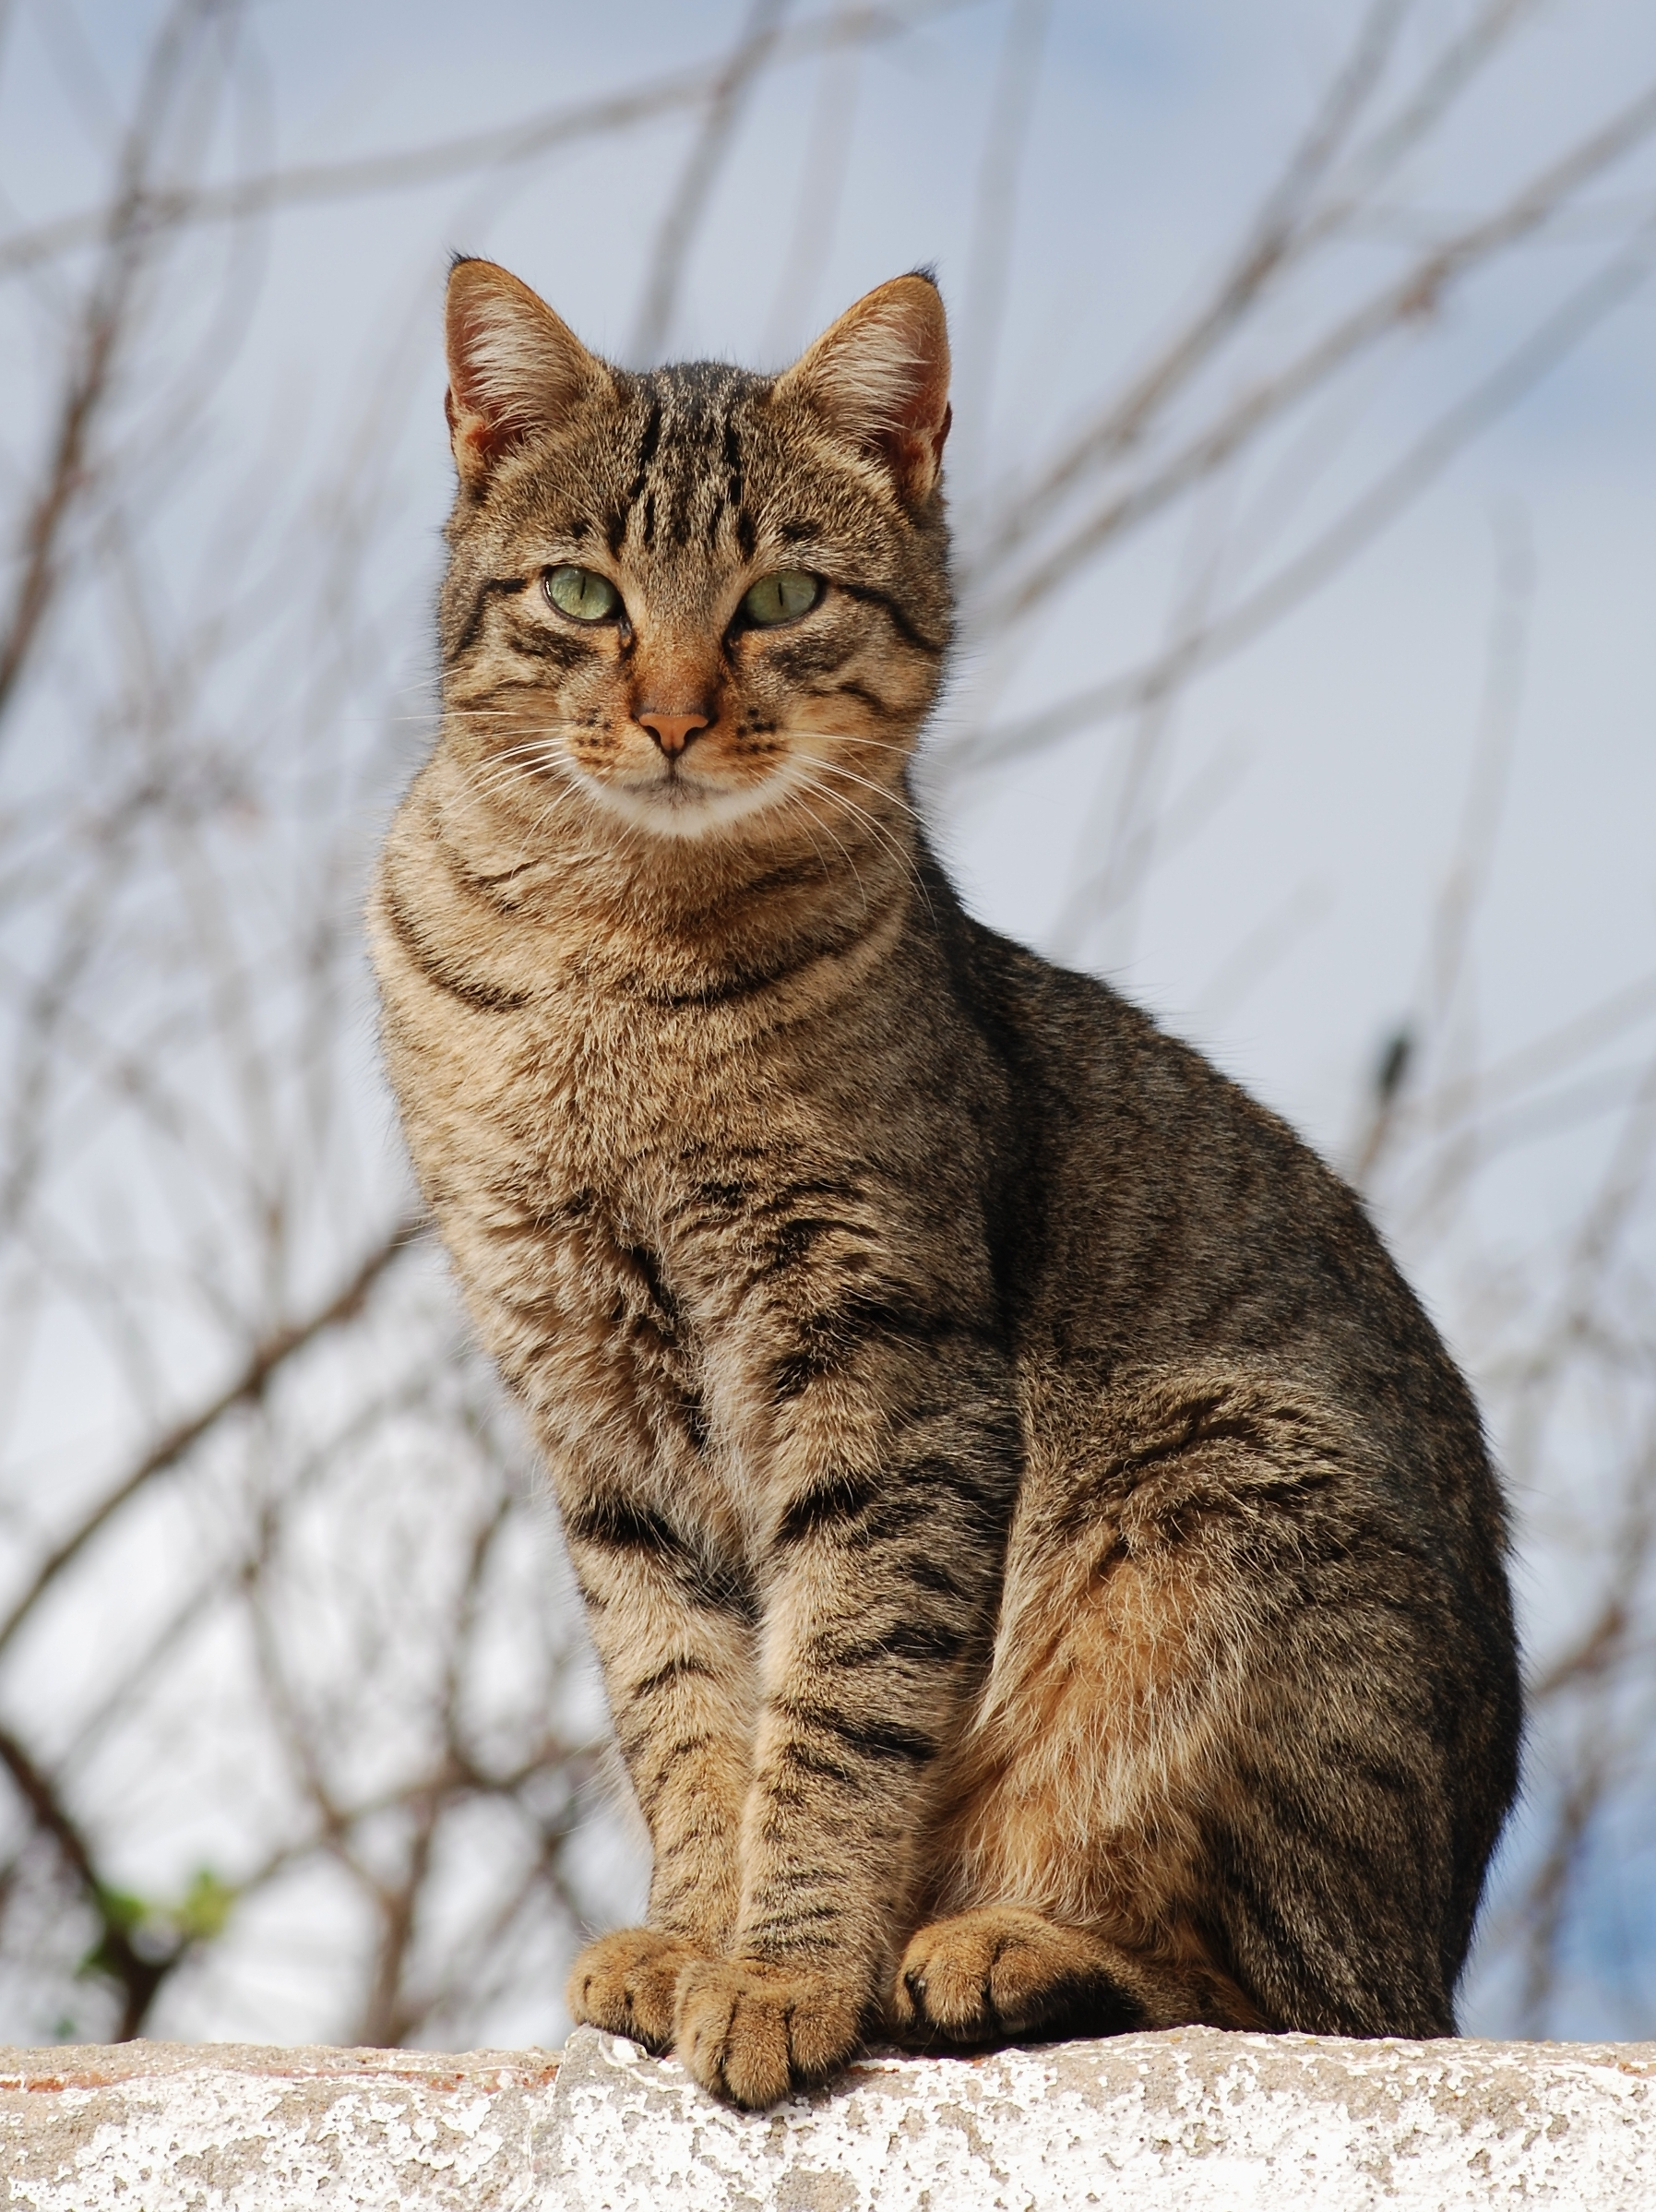

In [11]:
img = PILImage.create(upload.data[-1])  # rasm
pred, _, prob = learn.predict(img) # bashorat qilish (predict)
print(f'Mushukmi?: {pred}')
print(f'Aniqlik ehtimolligi: {prob[1].item():.3f}')
img